<a href="https://colab.research.google.com/github/mhmdfk/ShAI-Assignment/blob/main/Shai_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('/content/drive/MyDrive/mydata/test.csv')
train=pd.read_csv('/content/drive/MyDrive/mydata/train.csv')

Data Preprocessing and feature Engineering

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
train=train.drop(["Id"],axis=1)

In [5]:
train=train.drop(train[train["x"]==0].index)
train=train.drop(train[train["y"]==0].index)
train=train.drop(train[train["z"]==0].index)
train.shape

(43135, 10)

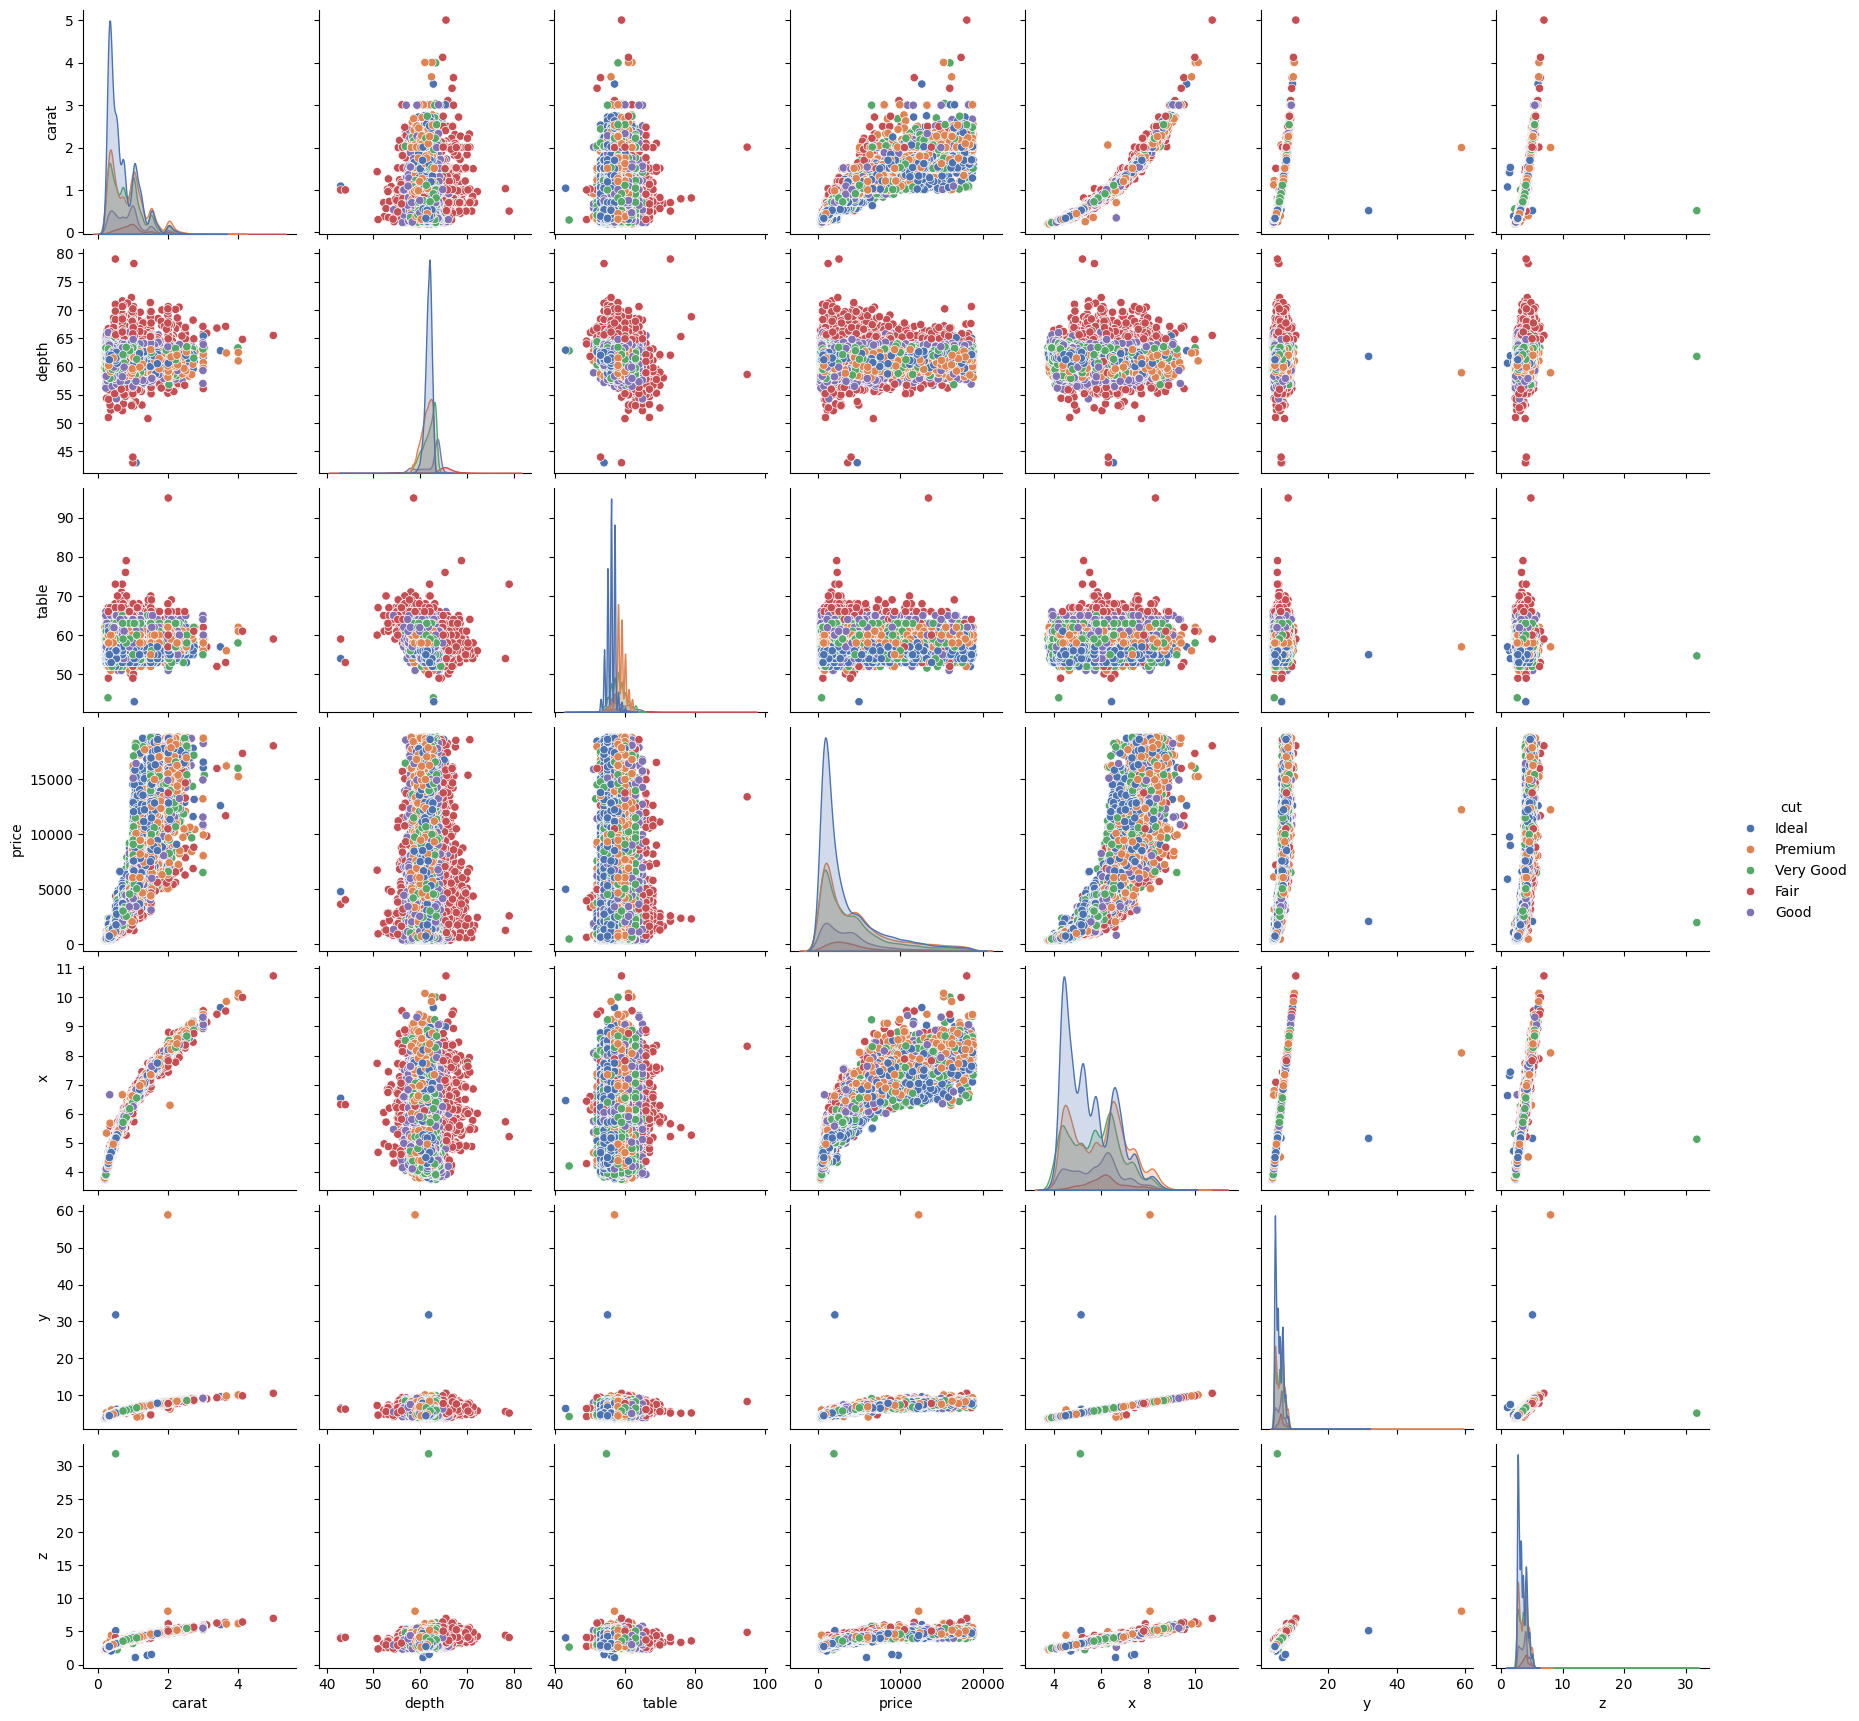

In [16]:
ax=sns.pairplot(train, hue= "cut",palette="deep")

In [6]:
train = train[(train["depth"] < 75) & (train["depth"] > 45)]
train = train[(train["table"] < 80) & (train["table"] > 40)]
train = train[(train["x"] < 30)]
train = train[(train["y"] < 30)]
train = train[(train["z"] < 30) & (train["z"] > 2)]
train.shape


(43123, 10)

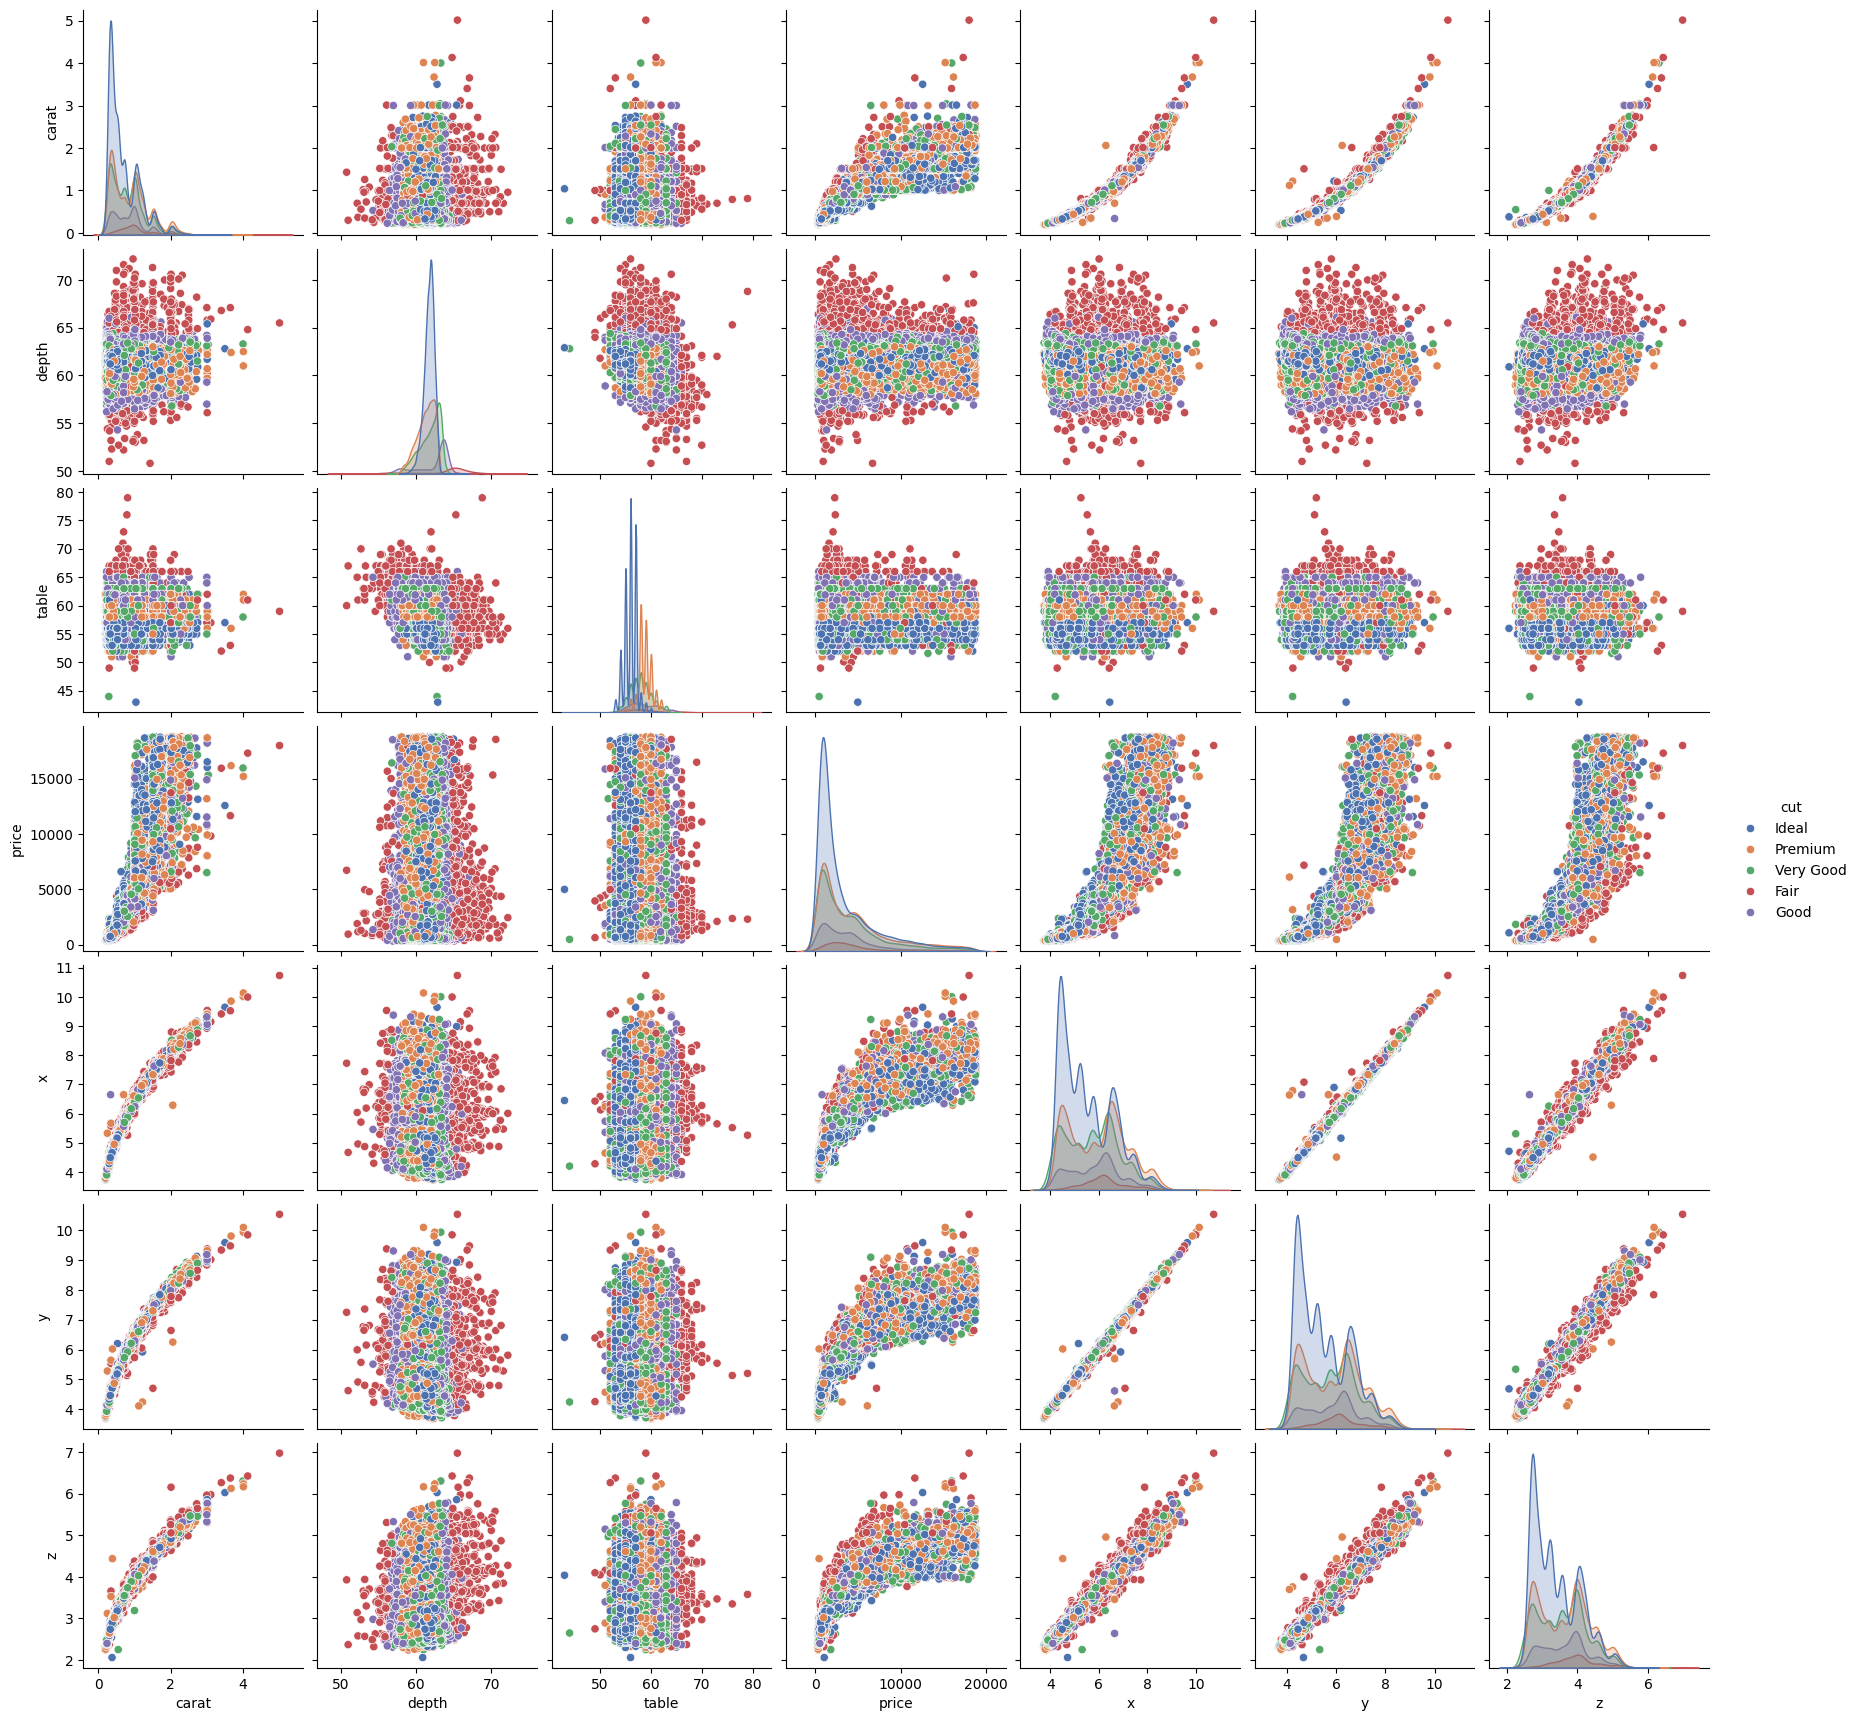

In [19]:
ax=sns.pairplot(train, hue= "cut",palette="deep")

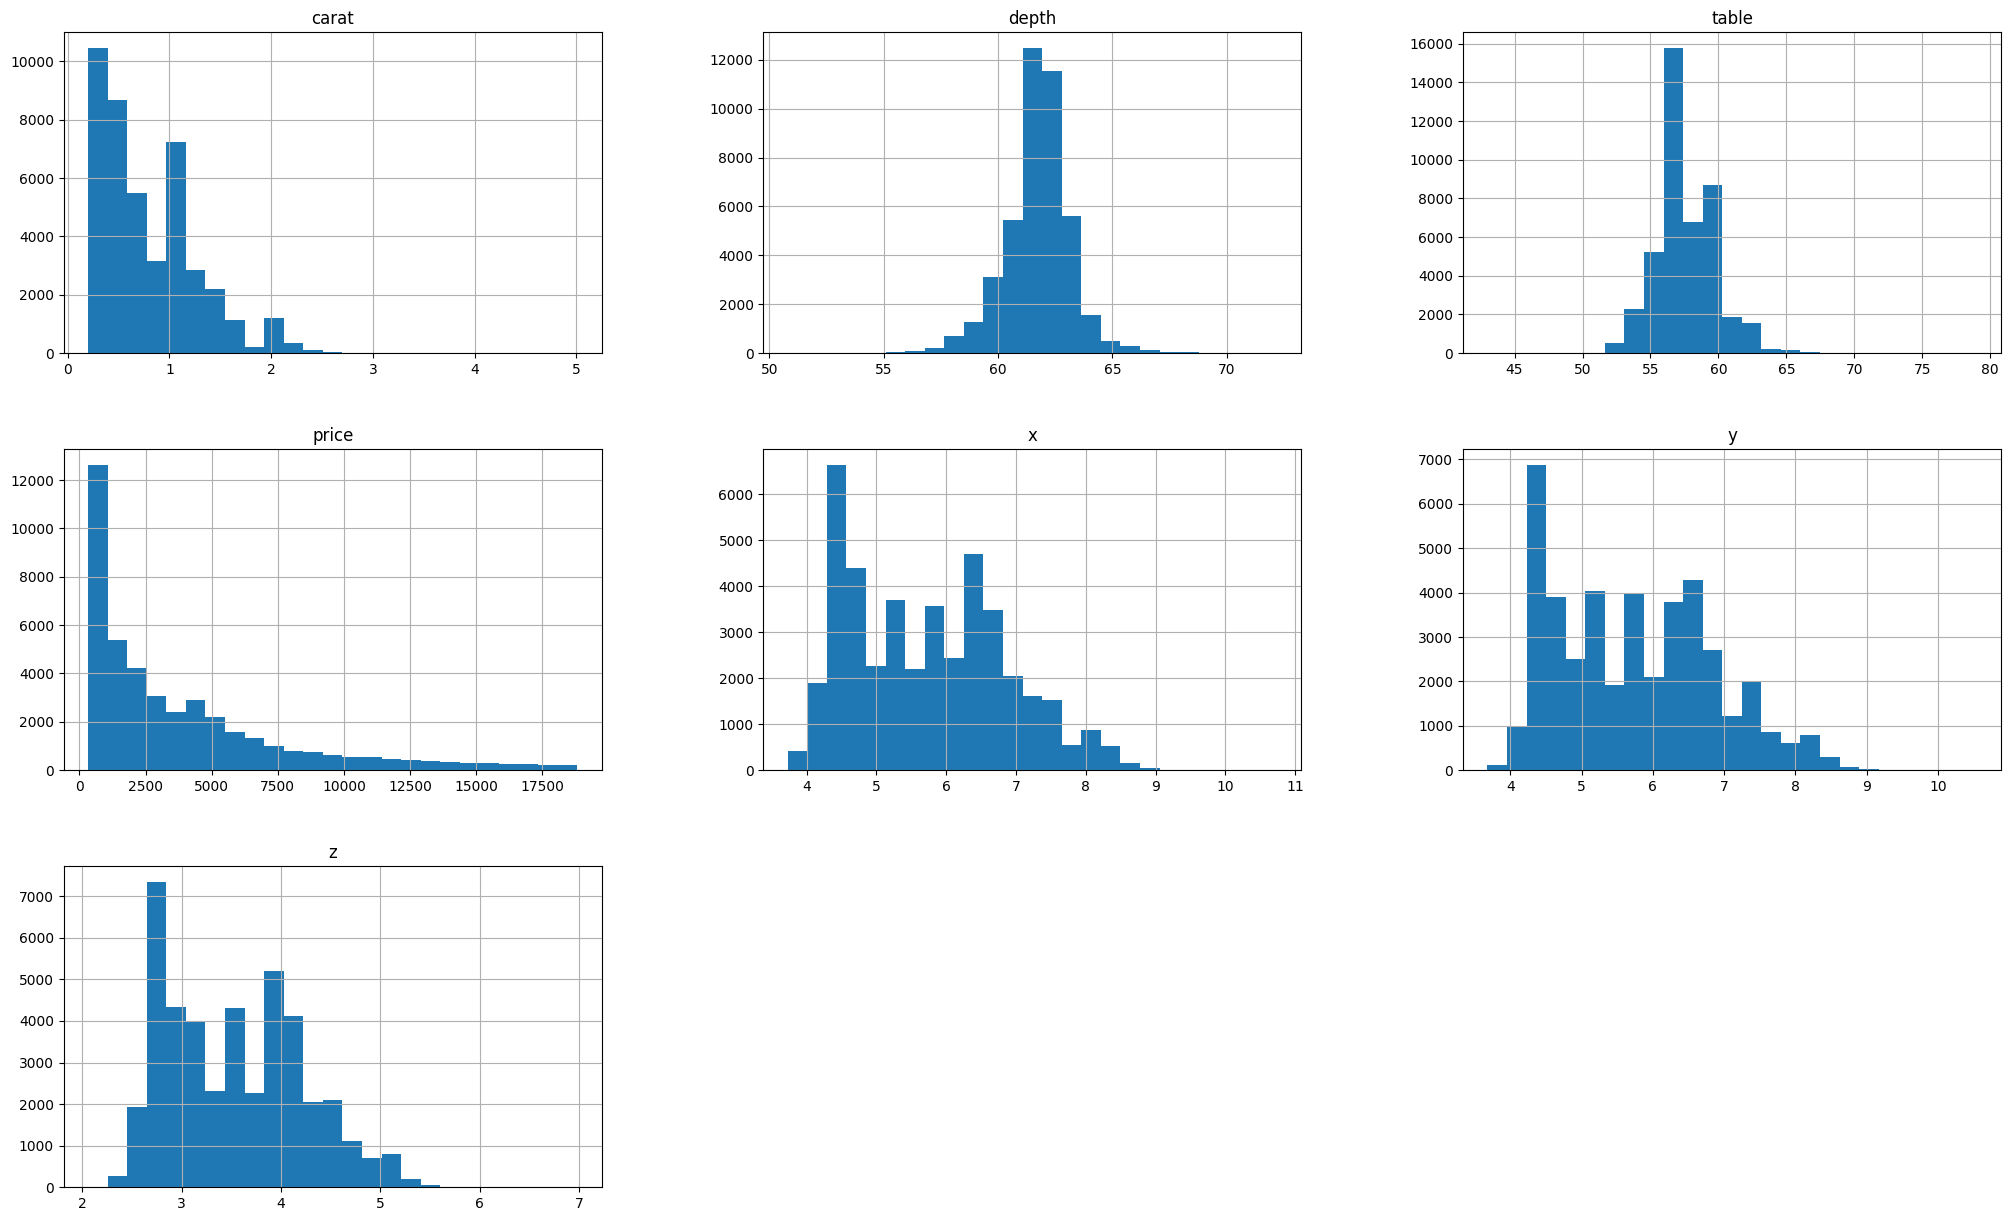

In [7]:
train.hist(bins=25,figsize=(25,15))
plt.show()

In [8]:
train['volume'] = train['x'] * train['y'] * train['z']
train['density'] = train['carat'] / train['volume']
train['surface_area'] = 2 * (train['x'] * train['y'] + train['x'] * train['z'] + train['y'] * train['z'])
train['depth_percentage'] = (train['depth'] / ((train['x'] + train['y'] + train['z']) / 3)) * 100
train['length_ratio_xy'] = train['x'] / train['y']
train['length_ratio_xz'] = train['x'] / train['z']
train['length_ratio_yz'] = train['y'] / train['z']

In [9]:
numdf = train.select_dtypes(include=np.number)
corrmat=numdf.corr()
corrmat['price'].sort_values()

depth_percentage   -0.817513
depth              -0.012773
length_ratio_yz    -0.007760
length_ratio_xz     0.030097
length_ratio_xy     0.086015
table               0.128278
density             0.179245
z                   0.882801
x                   0.887148
y                   0.888862
surface_area        0.911046
carat               0.921868
volume              0.923887
price               1.000000
Name: price, dtype: float64

In [10]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,depth_percentage,length_ratio_xy,length_ratio_xz,length_ratio_yz
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,193.9278,1075.406032,0.995455,1.614251,1.621622
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,243.0152,946.141895,0.994609,1.636364,1.645233
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,86.9854,1592.207792,1.004535,1.634686,1.627306
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,120.5994,1350.000000,0.994253,1.626959,1.636364
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,146.2544,1221.628838,1.006993,1.645714,1.634286


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# orders = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
#                  ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
#                  ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
# ordinal_encoder = OrdinalEncoder(categories=orders)
# train_cat_encoder = ordinal_encoder.fit_transform(train[['cut', 'color', 'clarity']])

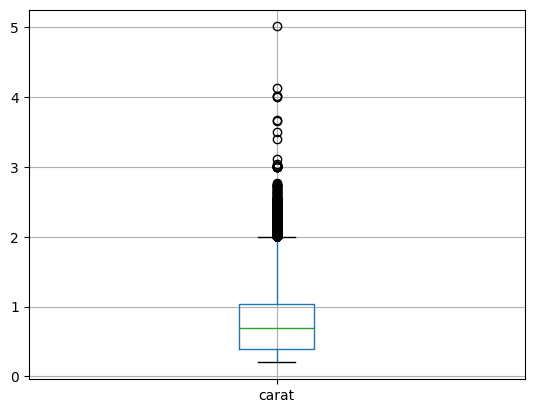

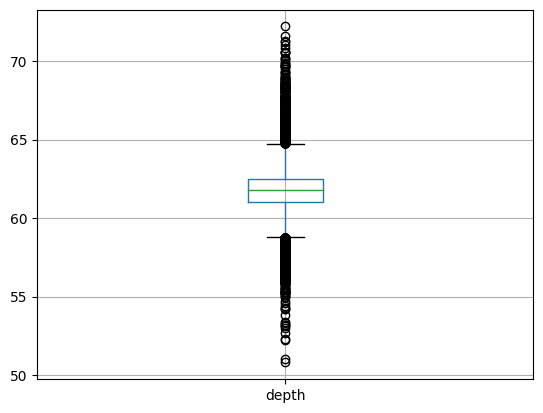

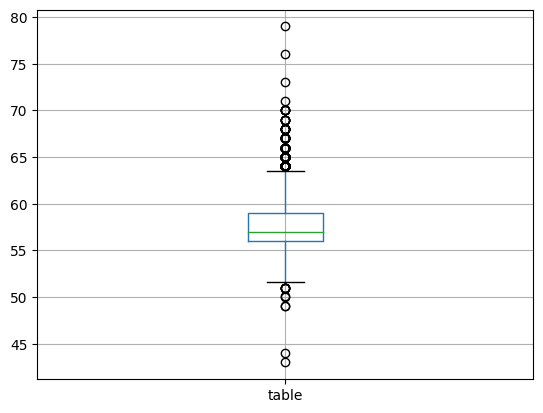

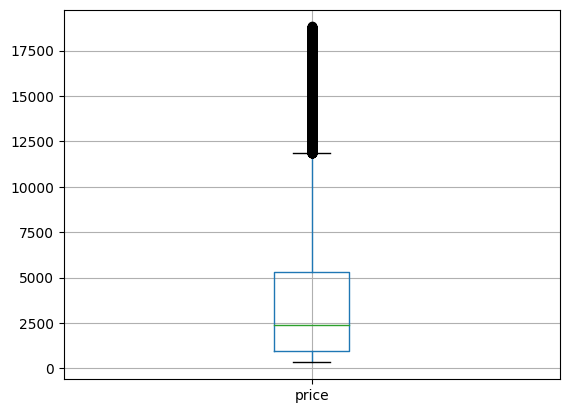

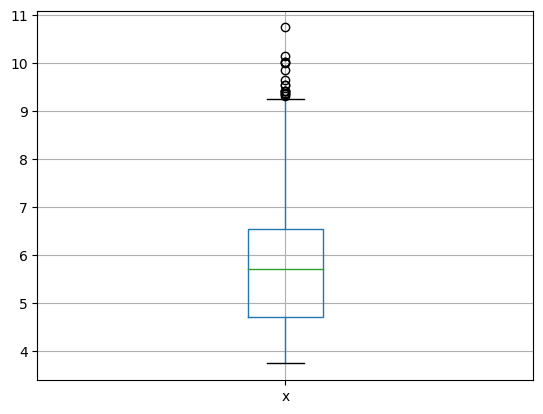

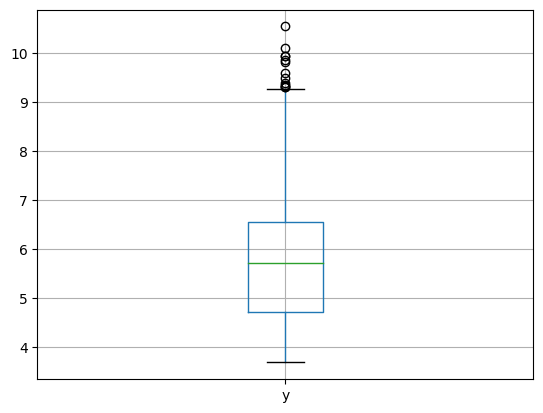

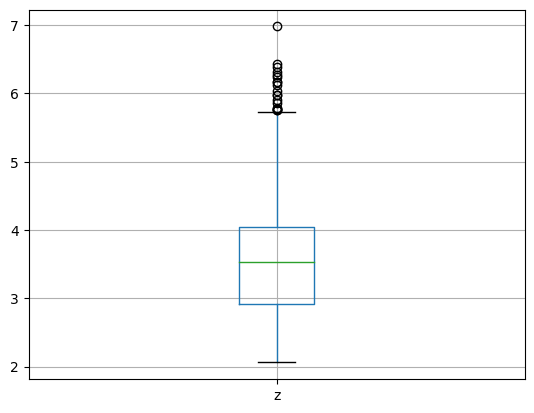

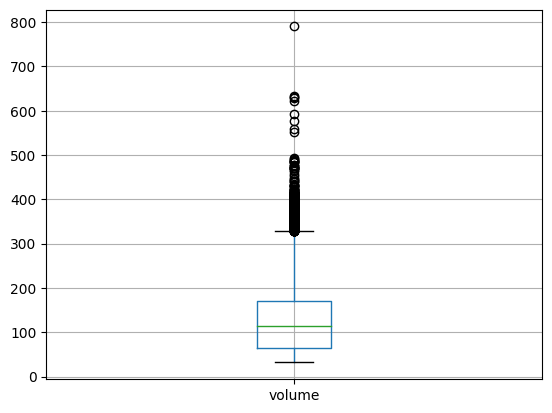

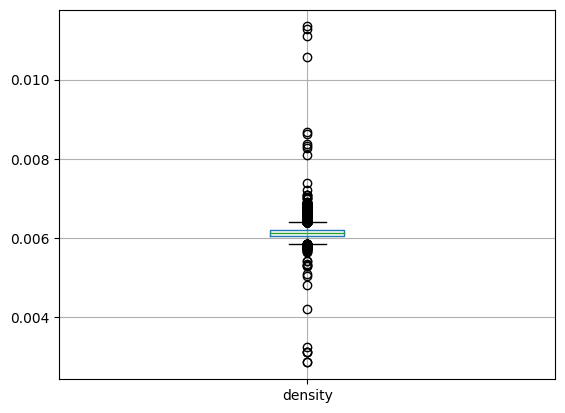

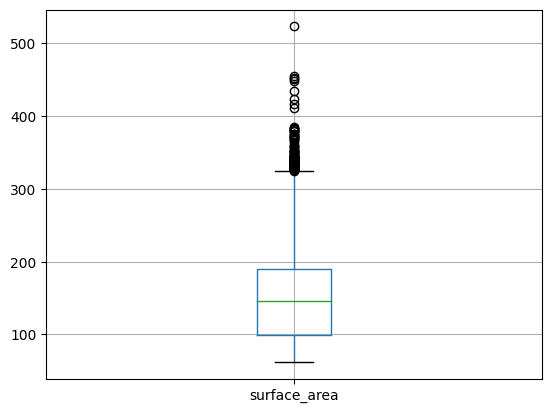

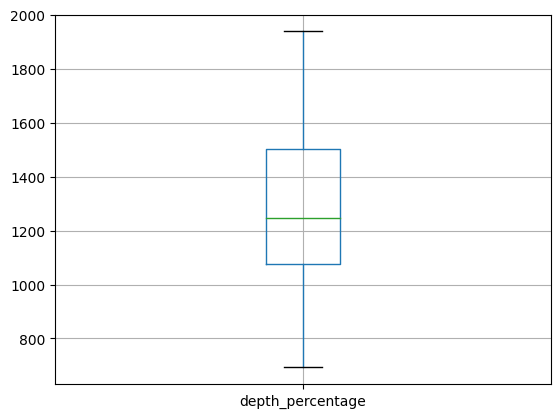

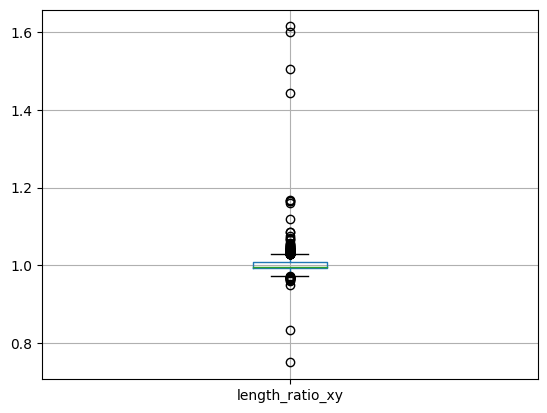

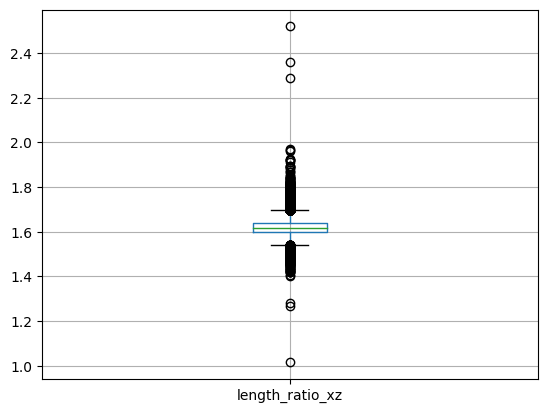

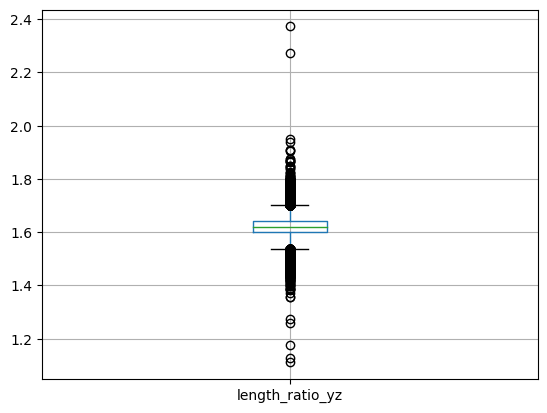

In [13]:
for column in numdf:
    plt.figure()
    numdf.boxplot([column])

In [21]:
trainl = train.drop(["price"], axis=1)
labels = train["price"].copy()

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
 ("standardize", StandardScaler()),
])

orders = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                 ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]

fullPip =  make_column_transformer(
 (num_pipeline, make_column_selector(dtype_include=np.number)),
 (OrdinalEncoder(categories=orders),make_column_selector(dtype_include="object"))
)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainl, labels, test_size=0.2, random_state=42)

In [24]:
X_train_prep = fullPip.fit_transform(X_train, y_train)
X_test_prep= fullPip.transform(X_test)

In [ ]:
test_ids = test['Id']

test.drop(columns=['Id'], inplace=True)

In [30]:


test = test.drop(test[test["x"] == 0].index)
test = test.drop(test[test["y"] == 0].index)
test = test.drop(test[test["z"] == 0].index)
test.shape

test['volume'] = test['x'] * test['y'] * test['z']
test['density'] = test['carat'] / test['volume']
test['surface_area'] = 2 * (test['x'] * test['y'] + test['x'] * test['z'] + test['y'] * test['z'])
test['depth_percentage'] = (test['depth'] / ((test['x'] + test['y'] + test['z']) / 3)) * 100
test['length_ratio_xy'] = test['x'] / test['y']
test['length_ratio_xz'] = test['x'] / test['z']
test['length_ratio_yz'] = test['y'] / test['z']

In [31]:
test_prep =fullPip.transform(test)

Data Modeling

In [51]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))

    return rmse

In [34]:
models={
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Lightgbm':LGBMRegressor(),
    'XGboost':xgb.XGBRegressor(),
    'RandomF':RandomForestRegressor(random_state=42)
}
trained_model_list=[]
model_list=[]


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_prep,y_train)


    pred=model.predict(X_test_prep)

    rmse=evaluate_model(y_test,pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("RMSE:",rmse)

    print('='*35)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.127e+09, tolerance: 5.491e+07
  model = cd_fast.enet_coordinate_descent(


Lasso
RMSE: 1167.484742904714


Ridge
RMSE: 1143.5944827008161


Elasticnet
RMSE: 1436.2665502454427


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 34498, number of used features: 16
[LightGBM] [Info] Start training from score 3935.979158
Lightgbm
RMSE: 510.30436174040153


XGboost
RMSE: 524.673142961183


RandomF
RMSE: 522.2681271943553




In [35]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.2-py2.py3-none-any.whl size=265365378 sha256=92ef83101453c0b3122c549e61e9a462587a5b6cccf898cc38a8f20f60c18a48
  Stored in directory: /root/.cache/pip/wheels/63/14/f4/9fff736a0df59884631031b604e7b000a70409f5b7adafc2c6
Successfully built h2o


In [36]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp8v362uc
  JVM stdout: /tmp/tmpp8v362uc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp8v362uc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_vjbui2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [53]:
h2o_data = h2o.H2OFrame(train)
h2o_data

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,depth_percentage,length_ratio_xy,length_ratio_xz,length_ratio_yz
1.06,Ideal,I,SI2,61.8,57,4270,6.57,6.6,4.07,176.483,0.00600623,193.928,1075.41,0.995455,1.61425,1.62162
1.51,Premium,G,VVS2,60.9,58,15164,7.38,7.42,4.51,246.966,0.00611421,243.015,946.142,0.994609,1.63636,1.64523
0.32,Ideal,F,VS2,61.3,56,828,4.43,4.41,2.71,52.9434,0.00604419,86.9854,1592.21,1.00454,1.63469,1.62731
0.53,Ideal,G,VS2,61.2,56,1577,5.19,5.22,3.19,86.4228,0.00613264,120.599,1350,0.994253,1.62696,1.63636
0.7,Premium,H,VVS2,61,57,2596,5.76,5.72,3.5,115.315,0.00607032,146.254,1221.63,1.00699,1.64571,1.63429
0.9,Very Good,G,IF,63.1,58,5670,6.18,6.09,3.87,145.652,0.00617911,170.242,1172.86,1.01478,1.5969,1.57364
0.71,Very Good,F,VS1,61.8,60,3017,5.66,5.7,3.51,113.24,0.00626989,144.271,1246.81,0.992982,1.61254,1.62393
0.7,Ideal,F,SI1,61.3,57,2288,5.72,5.77,3.52,116.175,0.00602537,146.898,1225.18,0.991334,1.625,1.6392
0.59,Ideal,D,VS1,60.9,56,2175,5.39,5.44,3.3,96.7613,0.00609748,130.121,1292.99,0.990809,1.63333,1.64848
0.31,Very Good,G,VVS1,59.8,62,761,4.35,4.41,2.62,50.2608,0.00616783,84.2694,1576.45,0.986395,1.66031,1.68321


In [54]:
h2o_data['clarity'] = h2o_data['clarity'].asfactor()
h2o_data['color'] = h2o_data['color'].asfactor()
h2o_data['cut'] = h2o_data['cut'].asfactor()

In [55]:
h2o_data.scale()
for col in h2o_data.columns:
    h2o_data.impute(column=col, method="median")
h2o_data.isna().sum()

0.0

In [56]:
from h2o.automl import H2OAutoML
h2o.init()

aml = H2OAutoML(max_runtime_secs=700,seed = 789)

aml.train(y="price", training_frame=h2o_data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_vjbui2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/16
# GBM base models (used / total),4/7
# XGBoost base models (used / total),2/4
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [57]:
h2o.init()

best_model = aml.leader
print(best_model)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_vjbui2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.026 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20240531_154343


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       7/16
# GBM base models (used / total)           4/7
# XGBoost base models (used / total)       2/4
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 173577.72701704229
RMSE: 416.6266038277468
MAE: 218.75832342094378
RMSLE: 0.07556616642058

In [58]:
h2o_train = h2o.H2OFrame(test)
h2o_train

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


carat,cut,color,clarity,depth,table,x,y,z,volume,density,surface_area,depth_percentage,length_ratio_xy,length_ratio_xz,length_ratio_yz
0.34,Ideal,G,VVS2,61.1,57,4.52,4.48,2.75,55.6864,0.00610562,89.9992,1560,1.00893,1.64364,1.62909
0.71,Premium,E,VS2,62.7,58,5.74,5.68,3.58,116.719,0.00608296,146.974,1254,1.01056,1.60335,1.58659
0.44,Very Good,I,VS1,62.8,56,4.83,4.88,3.05,71.8897,0.00612049,106.372,1476.49,0.989754,1.58361,1.6
0.81,Premium,E,SI2,60.1,59,6.09,6.03,3.65,134.038,0.00604307,161.921,1143.31,1.00995,1.66849,1.65205
0.4,Ideal,G,VVS1,61.2,56,4.74,4.8,2.92,66.4358,0.00602085,101.218,1473.52,0.9875,1.62329,1.64384
1.27,Ideal,F,VS1,61.6,55,6.97,7.03,4.31,211.186,0.00601365,218.678,1009.28,0.991465,1.61717,1.63109
1.01,Very Good,G,VS2,61.5,56,6.41,6.47,3.96,164.232,0.00614984,184.955,1095.61,0.990726,1.61869,1.63384
1.24,Fair,F,SI2,64.9,60,6.7,6.63,4.32,191.899,0.00646174,204.013,1103.12,1.01056,1.55093,1.53472
0.71,Fair,I,VS2,61.6,67,5.76,5.61,3.5,113.098,0.00627776,144.217,1242.77,1.02674,1.64571,1.60286
0.37,Very Good,G,VS1,61.5,58,4.57,4.6,2.82,59.282,0.00624135,93.7628,1538.78,0.993478,1.62057,1.63121


In [59]:
h2o_train['clarity'] = h2o_train['clarity'].asfactor()
h2o_train['color'] = h2o_train['color'].asfactor()
h2o_train['cut'] = h2o_train['cut'].asfactor()

In [60]:
h2o_train.scale()
for col in h2o_train.columns:
    h2o_train.impute(column=col, method="median")
h2o_train.isna().sum()

0.0

In [62]:
from h2o.automl import H2OAutoML

h2o.init()

predictions = best_model.predict(h2o_train)

predictions_df = predictions.as_data_frame()

predictions_df['Id'] = test_ids

predictions_df = predictions_df[['Id','predict']]

predictions_df = predictions_df.rename(columns={'predict': 'price'})
predictions_df = predictions_df.rename(columns={'Id': 'Id'})

print(predictions_df)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,19 mins 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_vjbui2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.025 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
          Id         price
0          1    949.299841
1          2   2824.460995
2          3    820.442134
3          4   2780.103578
4          5   1088.453662
...      ...           ...
10780  10781   1729.108479
10781  10782   6334.806852
10782  10783   4421.331371
10783  10784   4792.192486
10784  10785  14122.266449

[10785 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
predictions_df.to_csv('sub3.csv', index=False)